In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import missingno as mno
import os

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/diabetes.csv")

In [4]:
df = data.copy()

In [5]:
df1 = data.copy()

In [6]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe(include = "all").style.background_gradient(cmap="cividis")

In [12]:
(data.describe().T).style.background_gradient(cmap="coolwarm")

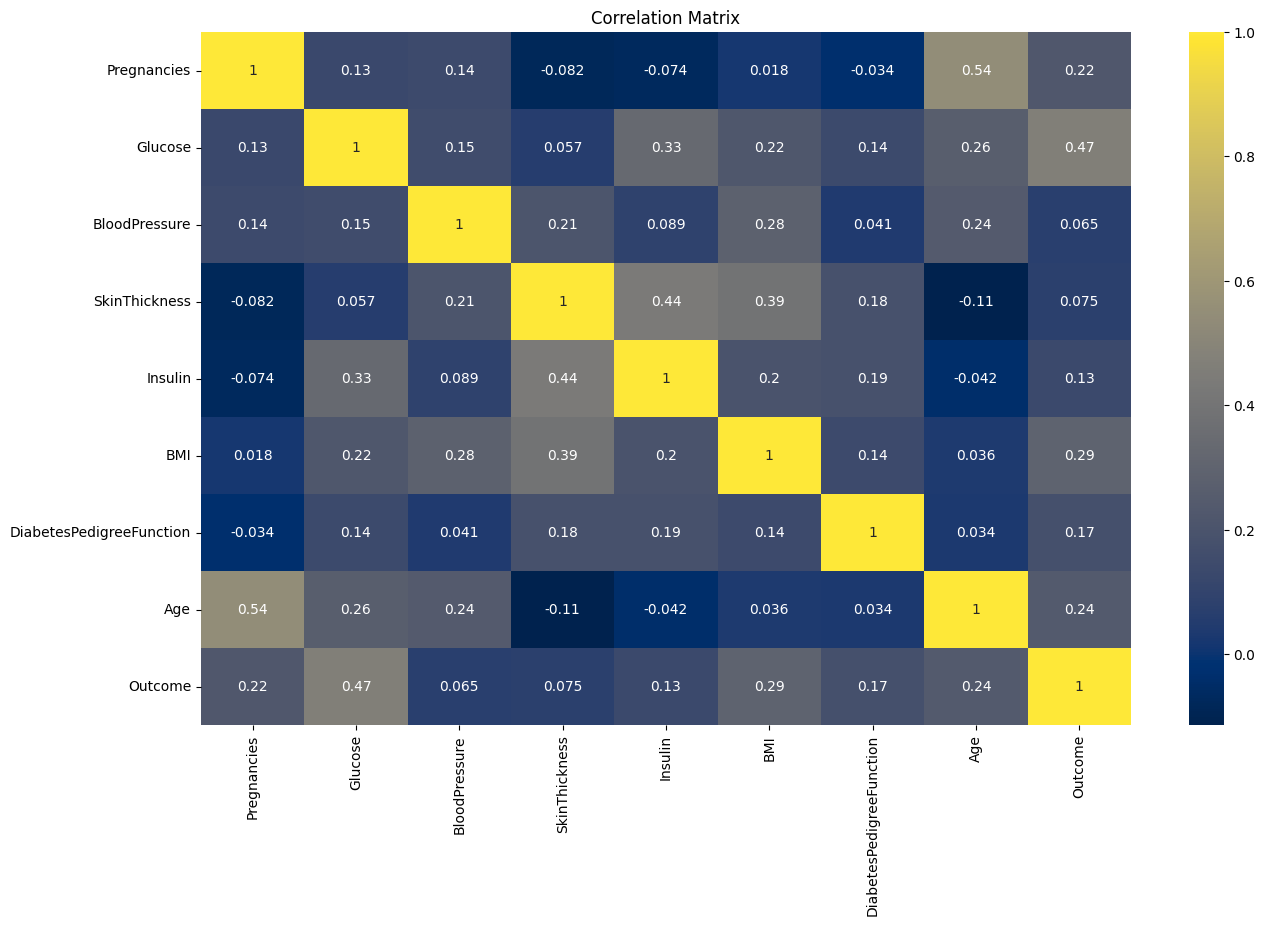

In [13]:
# Calculating and visualizing the correlation matrix using Heatmap.

plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True, cmap='cividis')
plt.title("Correlation Matrix")
plt.show()

**`1` DATA VISUALIZATION**

<Axes: xlabel='Outcome', ylabel='count'>

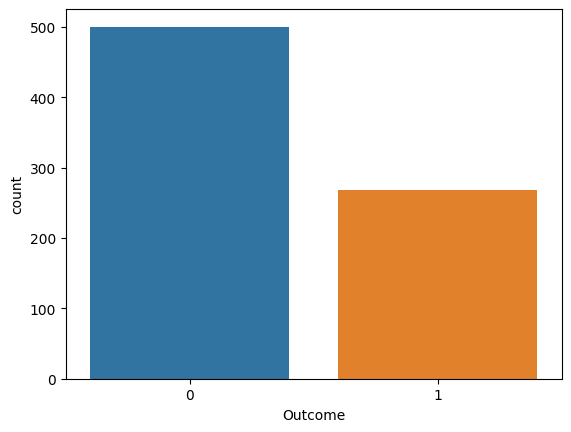

In [14]:
# Checking the Outcome

sns.countplot(x = "Outcome", data = data)


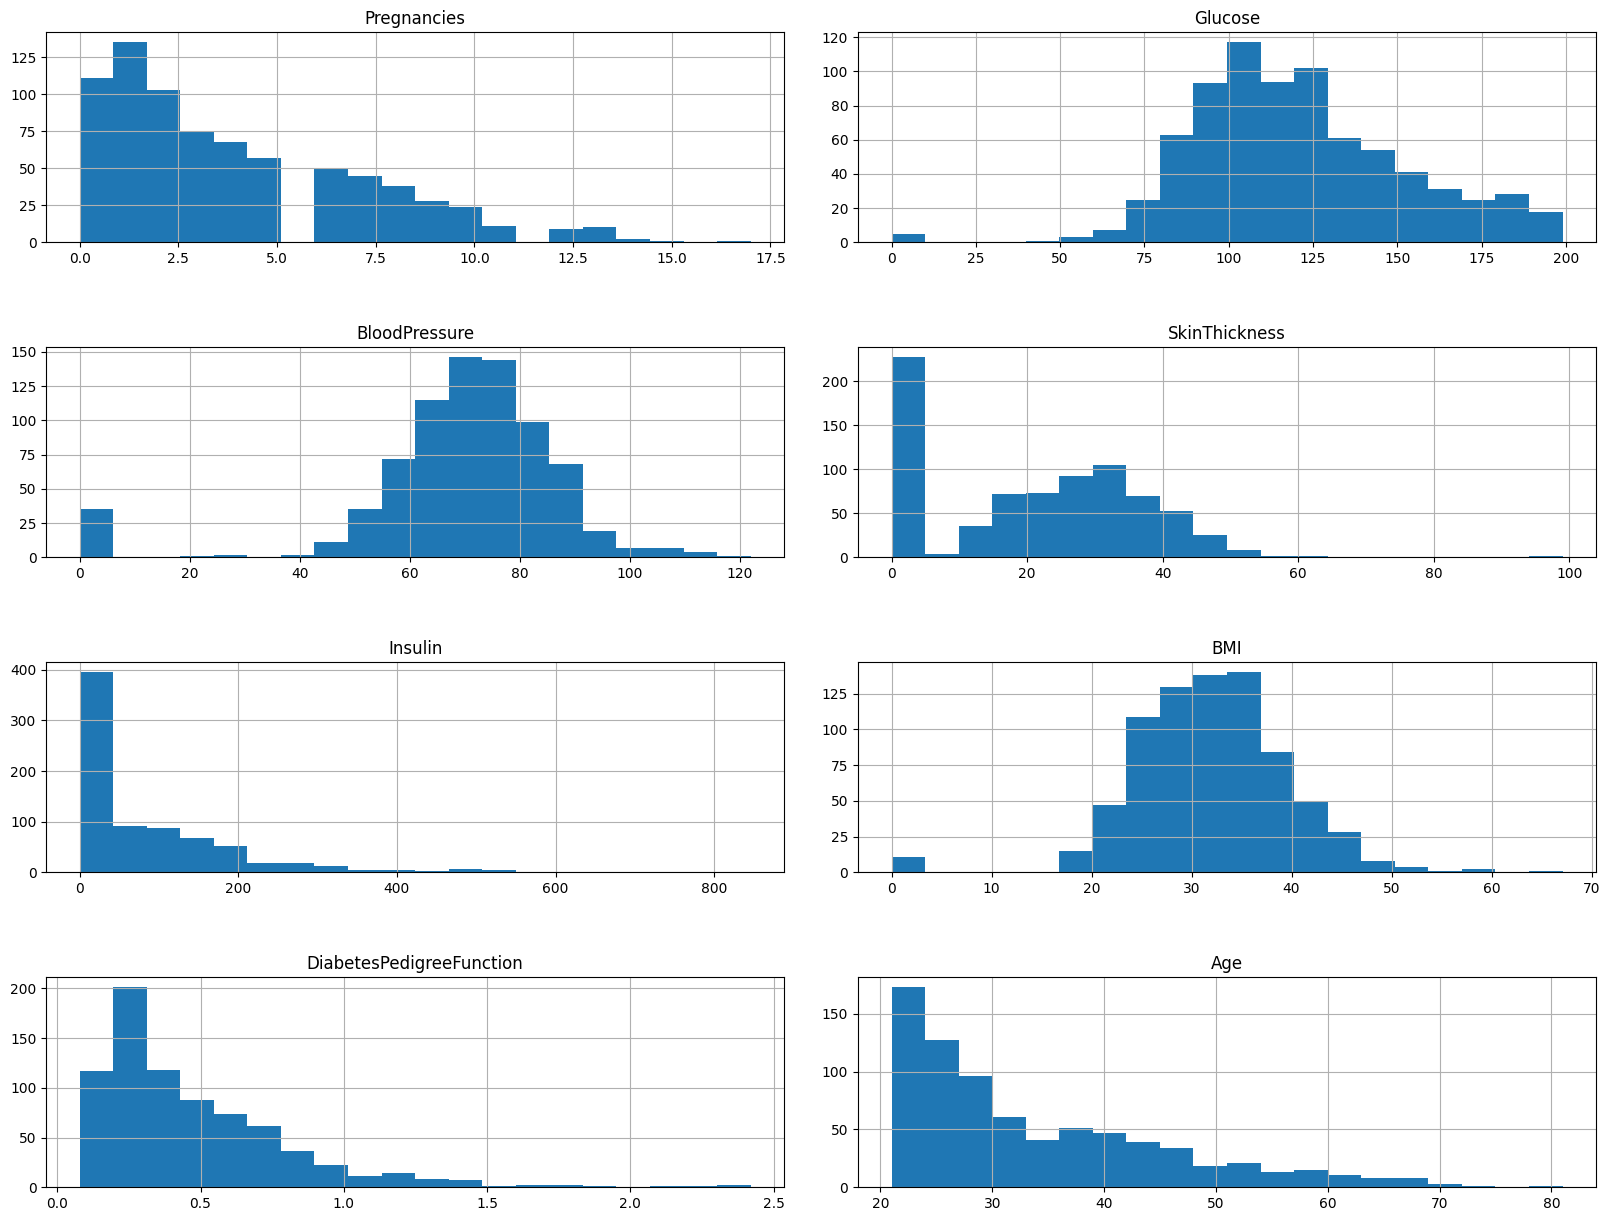

In [17]:
# Histogram for Each Column

import itertools

col = data.columns[:8]
plt.subplots(figsize =(20,15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 2, j+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    data[i].hist(bins=20)
    plt.title(i)
plt.show()


<Figure size 2000x1000 with 0 Axes>

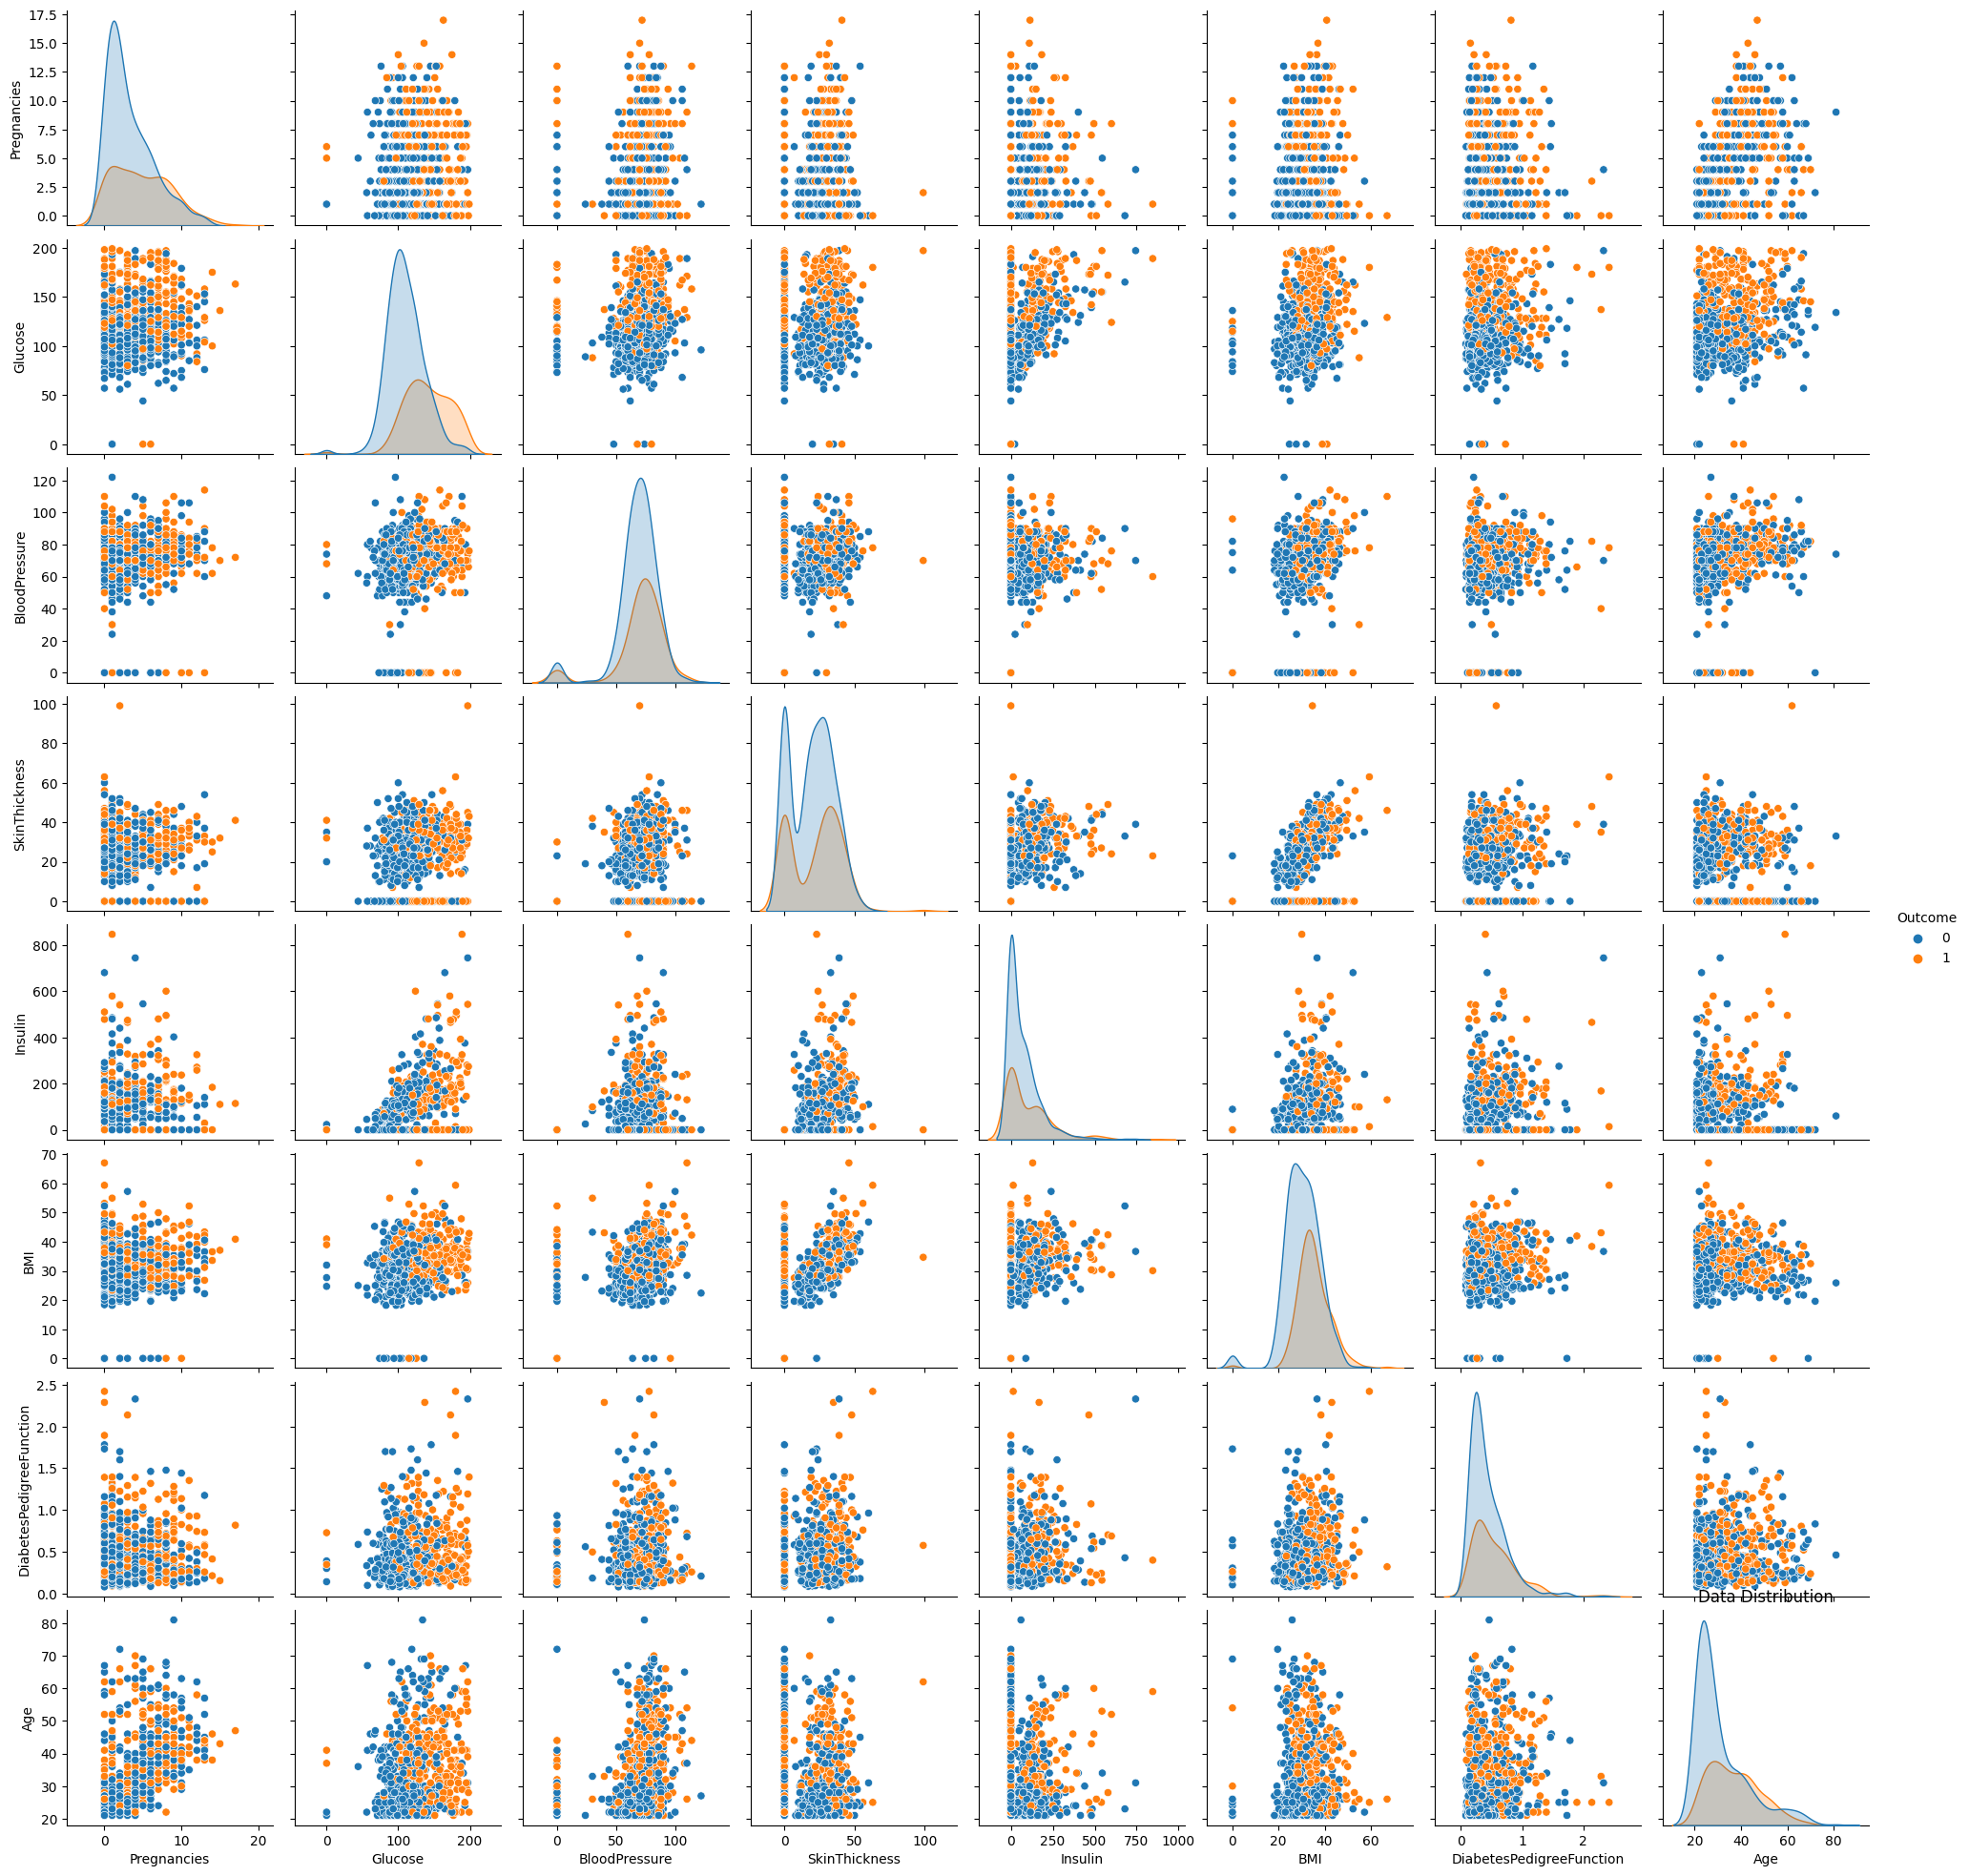

In [18]:
# Data distribution

plt.figure(figsize=(20,10))
sns.pairplot(data, hue = "Outcome")
plt.title("Data Distribution")
plt.show()


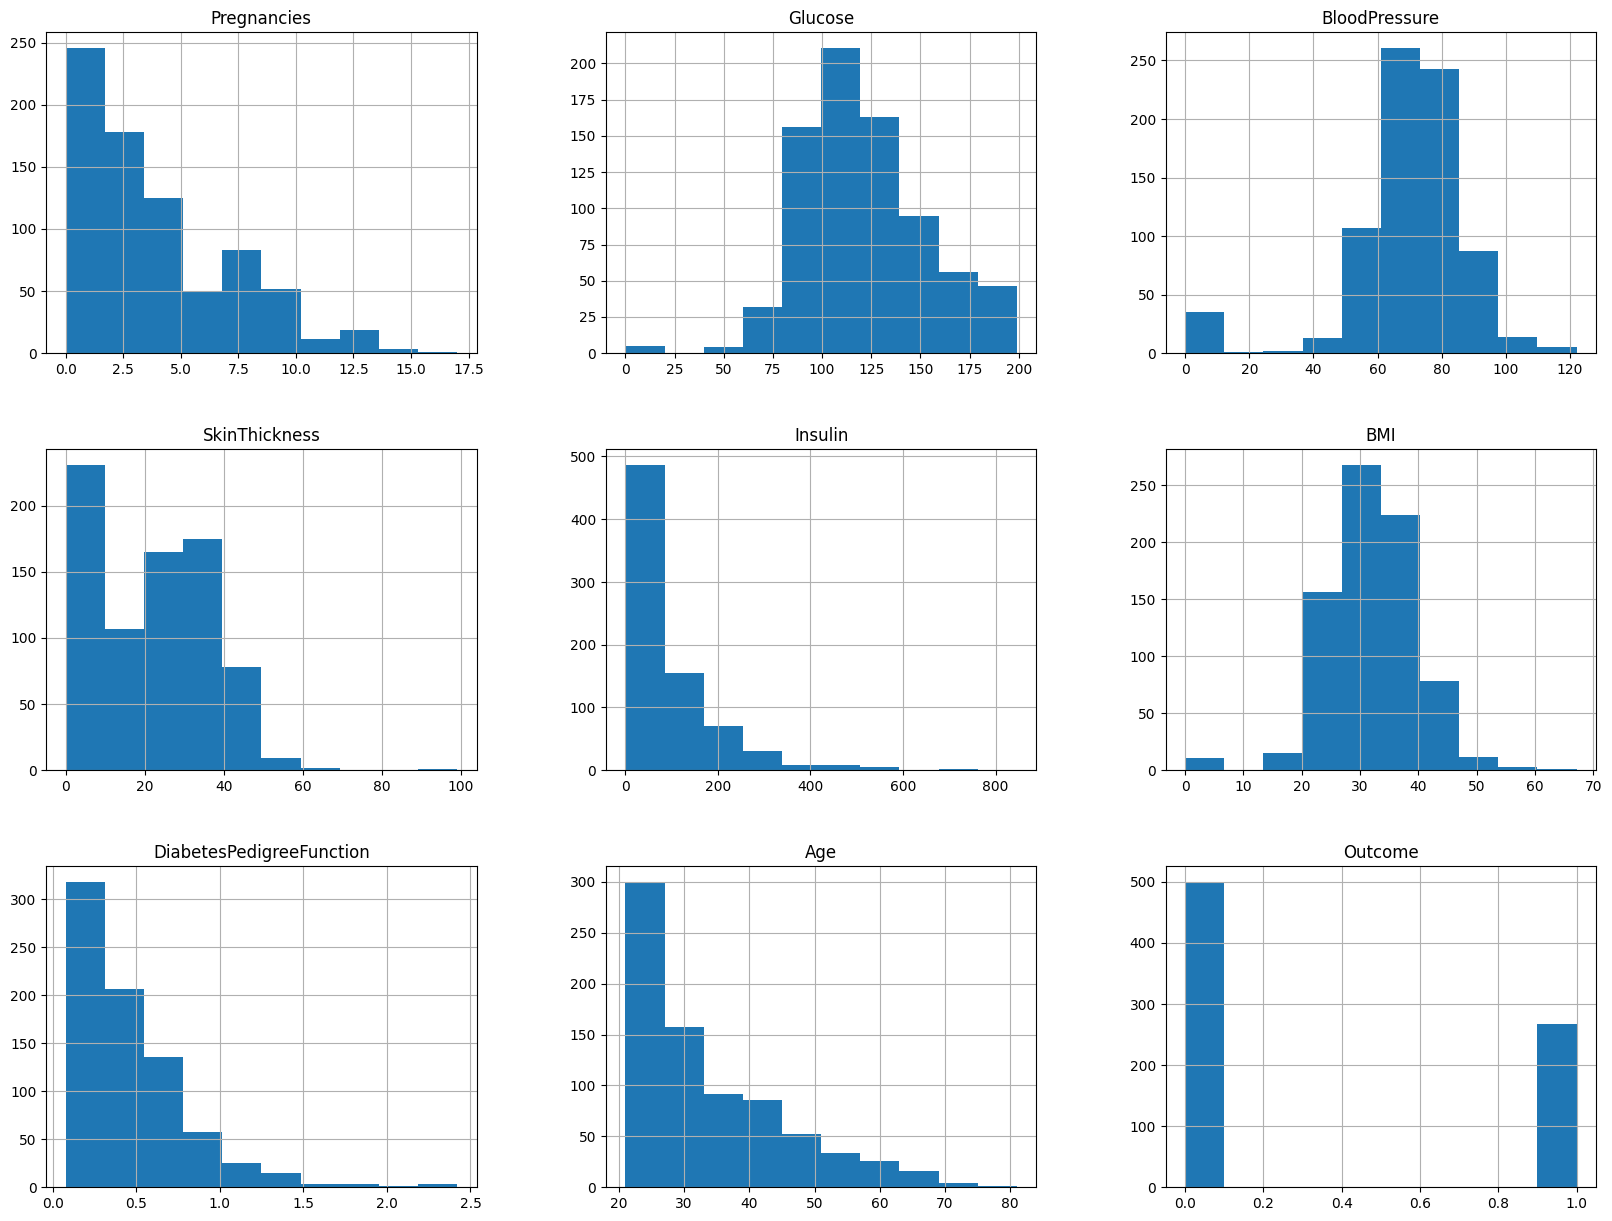

In [19]:
p = data.hist(figsize=(20,15))

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

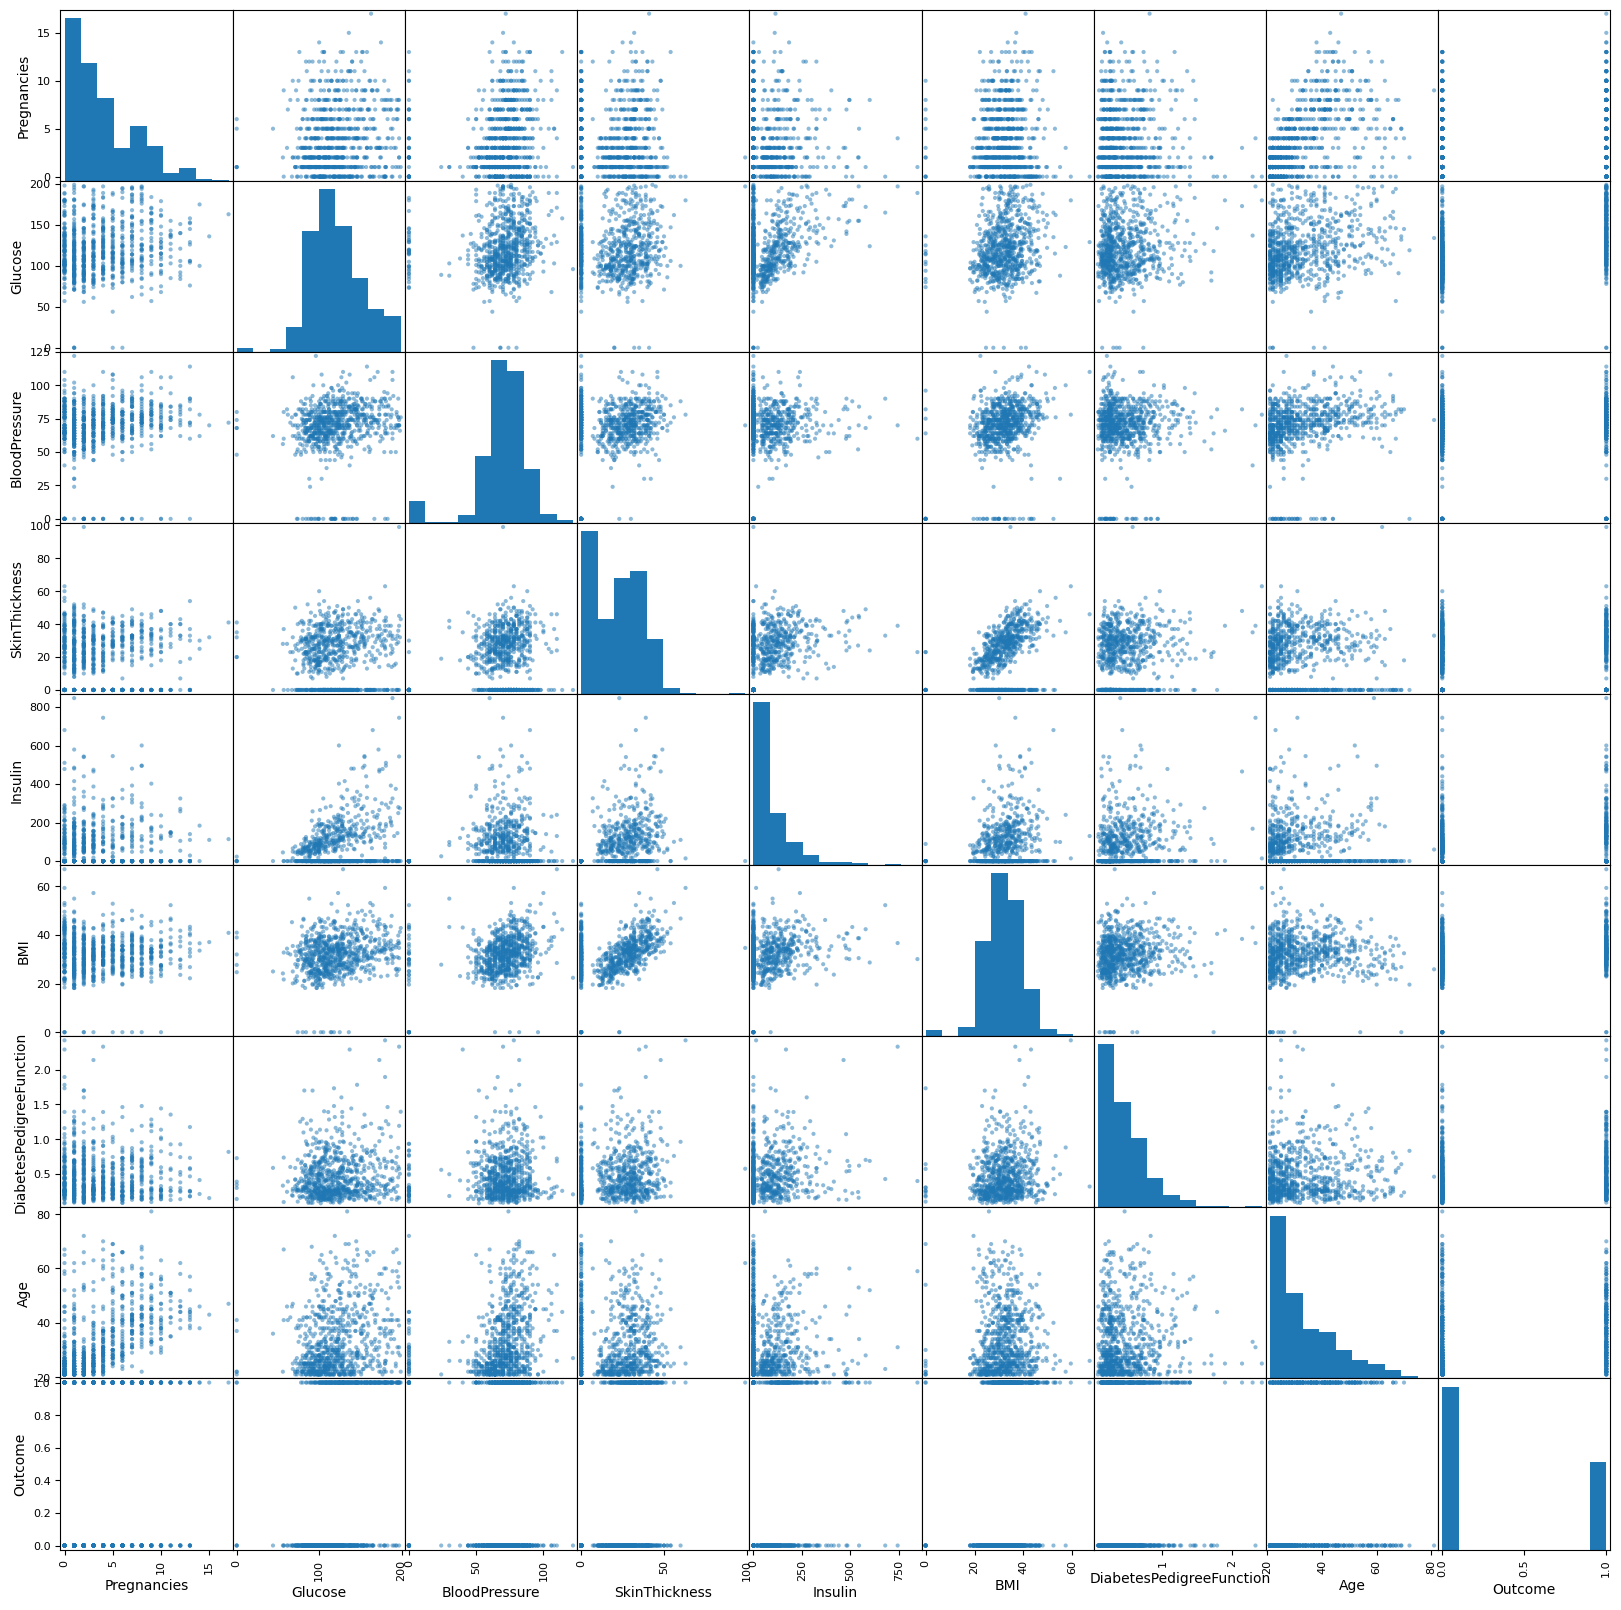

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(20,20))

In [21]:
# Measuring BMI Category using BMI Value.

def bmi_measure(value):
    if value < 18.5:
      return "under weight"
    elif value >= 18.5 and value <= 24.9 :
      return "Healthy"
    elif value >= 25 and value > 29.9:
      return "OverWeight"
    else:
      return "Obese"


## Creating a Column to visualize BMI

df1["BMI_measure"] = data['BMI'].apply(bmi_measure)




In [22]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome BMI_measure  
0                     0.627   50        1  OverWeight  
1                     0.351   31        0       Obese  
2                     0.672   32        1     Healthy  
3                     0.167   21        0       Obese  
4                     2.288   33        1  OverWeight

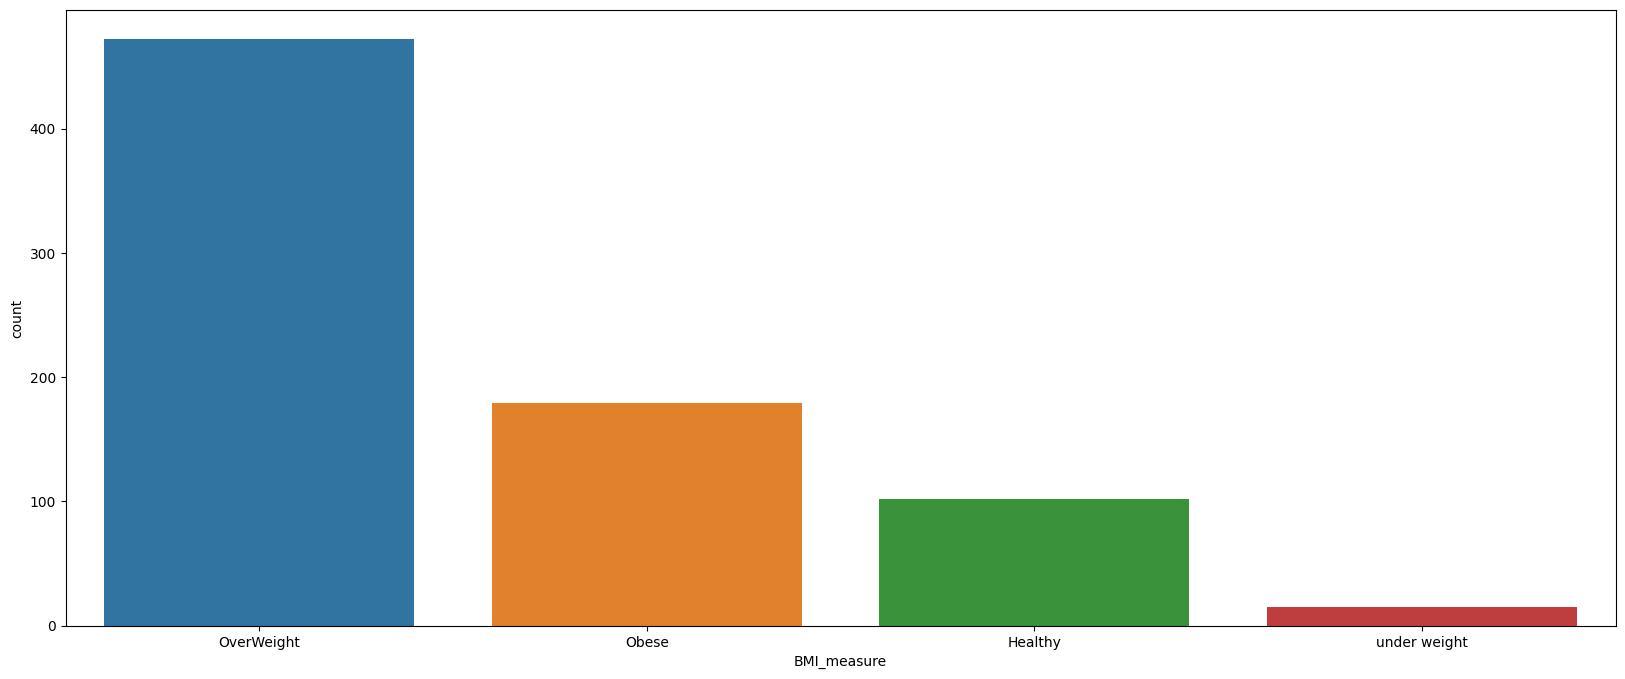

In [23]:
# Checking BMI

plt.figure(figsize=(20,8))
sns.countplot(x="BMI_measure", data=df1)
plt.show()

In [25]:
## Adding Diabetes result as a new column for Visualization

def result(res):
  if res == 1:
    return "Positive"
  else:
    return "Negative"

df1['Diabetes Result'] = data['Outcome'].apply(result)
df1.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome   BMI_measure Diabetes Result  
0                     0.627   50        1    OverWeight        Positive  
1                     0.351   31        0         Obese        Negative  
2                     0.672   32        1       Healthy        Positive  
3                     0.167   21        0         Obese        Negative  
4                     2.288   33        1    OverWeight        Positive  
5                     0.201   30        0         Obese        Negative  
6                     0.248   26        1    OverWeight        Positive  
7                     0.134   29        0    OverWeight        Negative  
8                     0.158   53        1    OverWeight        Positive  
9                     0.232   54        1  under weight        Positive

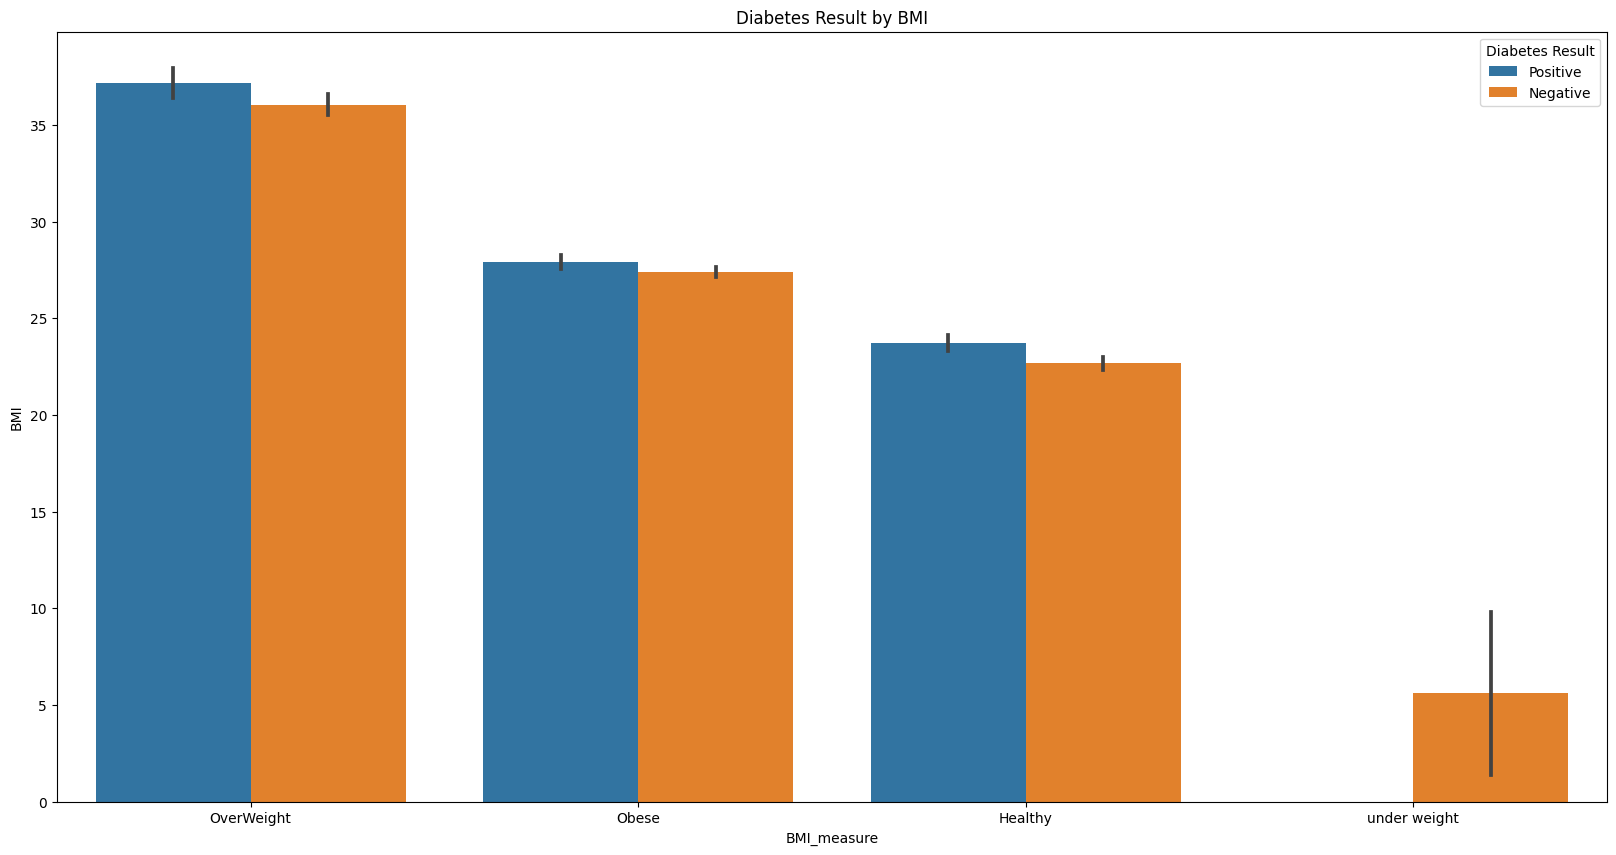

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x = "BMI_measure", y = "BMI", data=df1,hue="Diabetes Result")
plt.title("Diabetes Result by BMI")
plt.show()


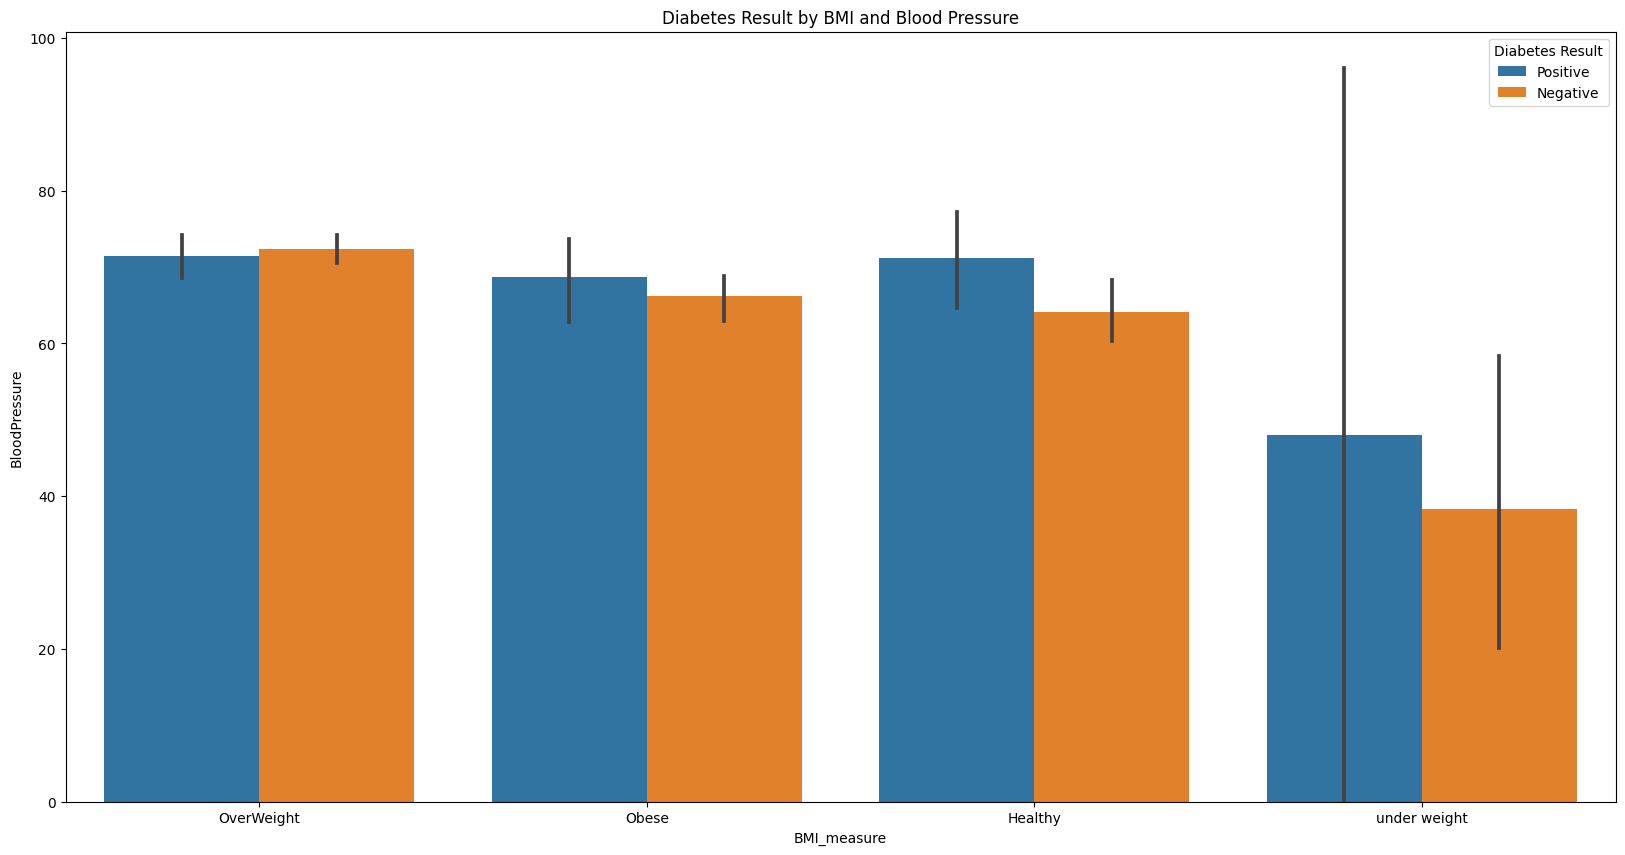

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x="BMI_measure", y="BloodPressure", data=df1, hue="Diabetes Result")
plt.title("Diabetes Result by BMI and Blood Pressure")
plt.show()

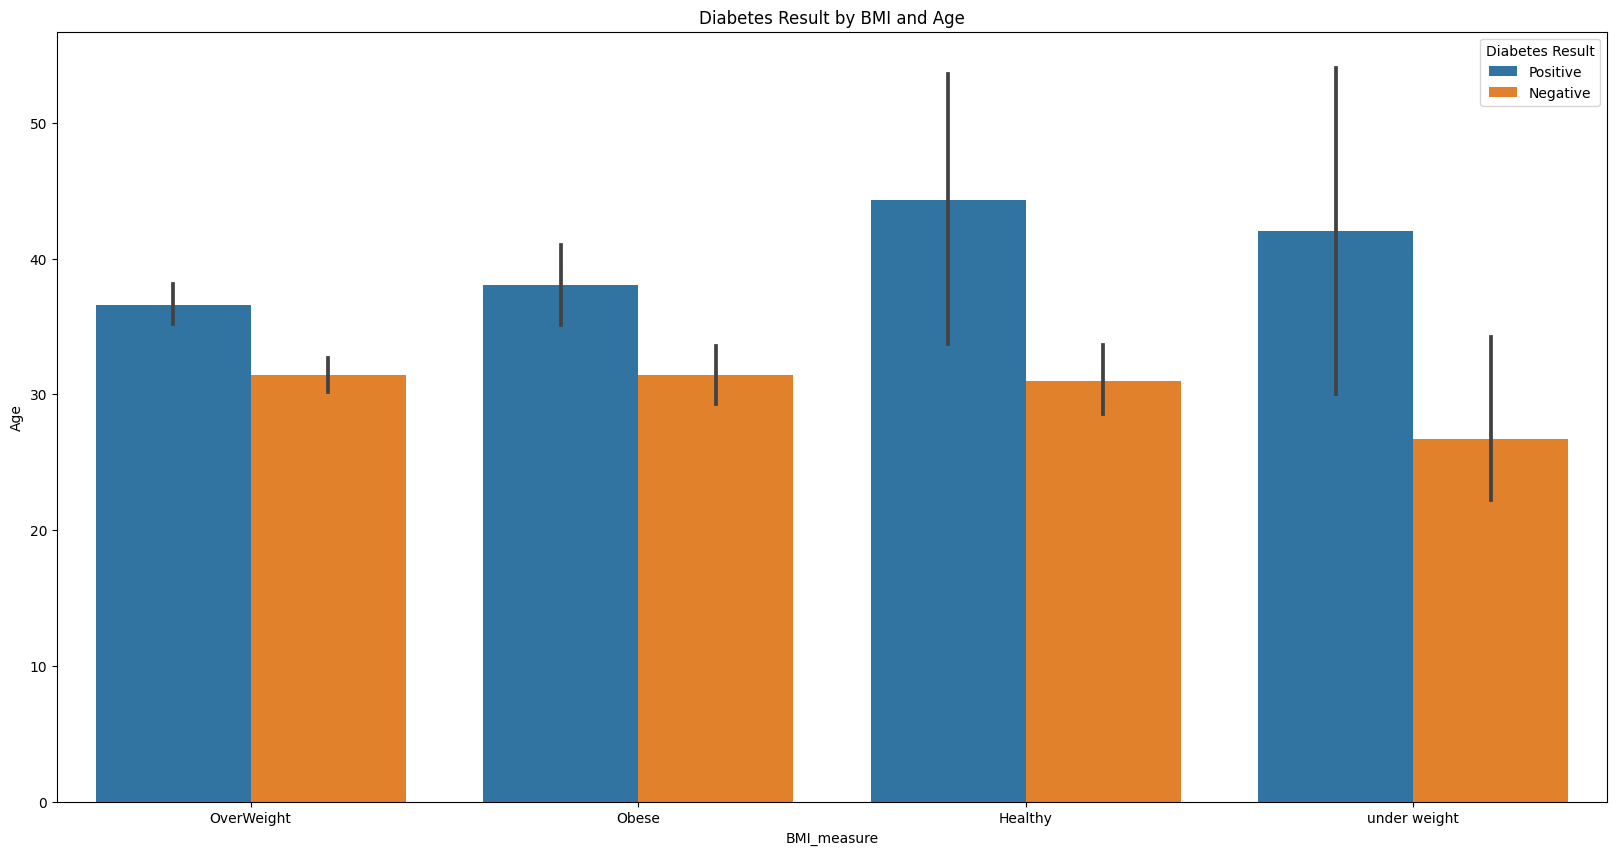

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x="BMI_measure", y="Age", data=df1, hue="Diabetes Result")
plt.title("Diabetes Result by BMI and Age")
plt.show()

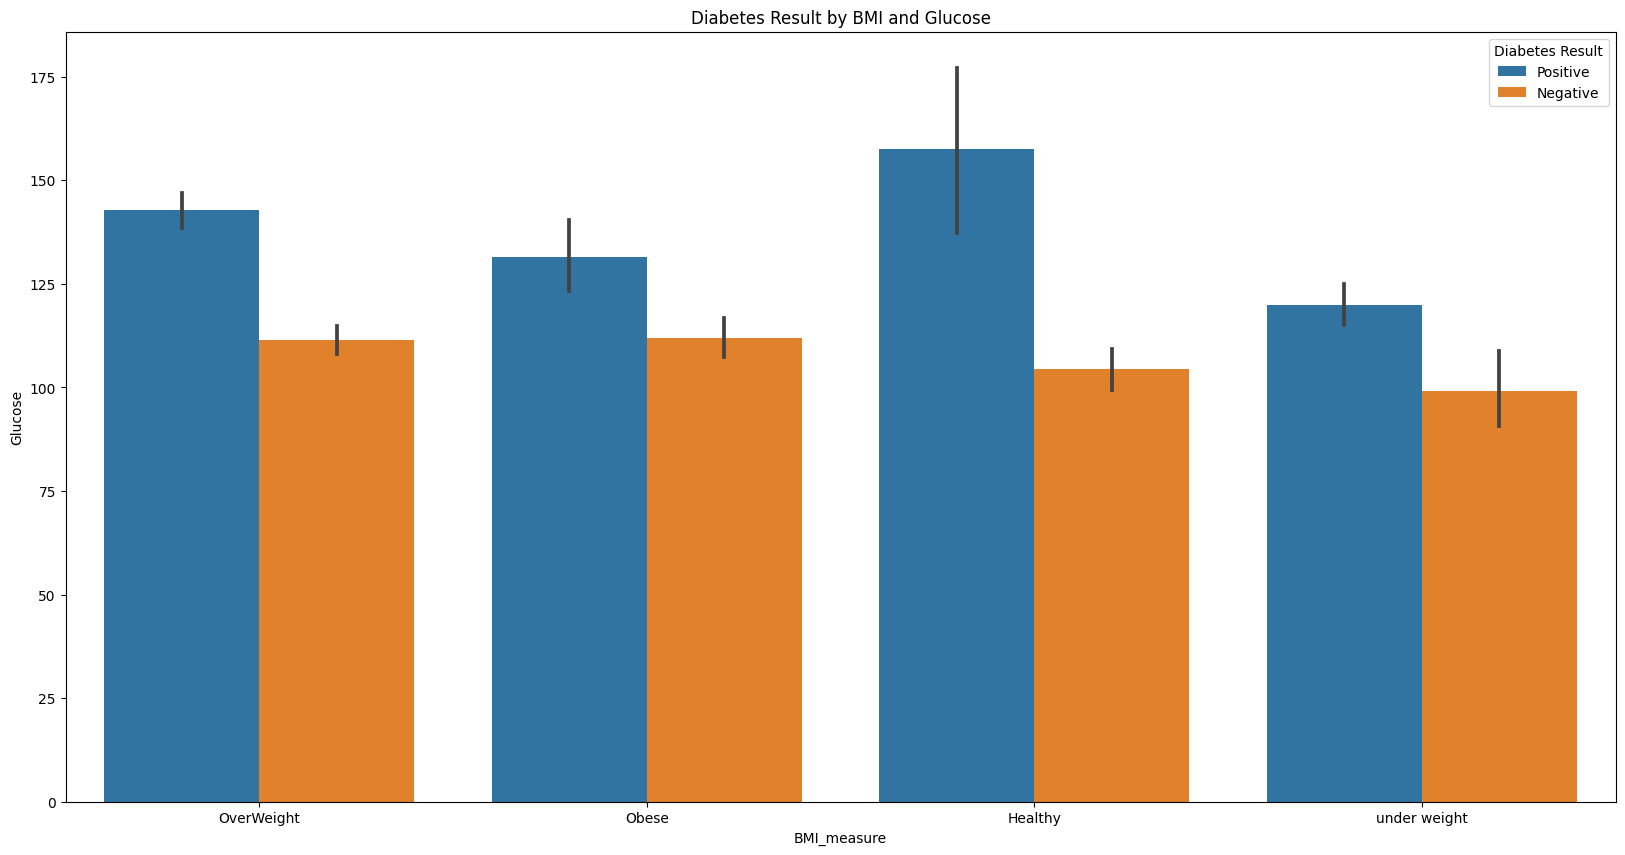

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x="BMI_measure", y="Glucose", data=df1, hue="Diabetes Result")
plt.title("Diabetes Result by BMI and Glucose")
plt.show()

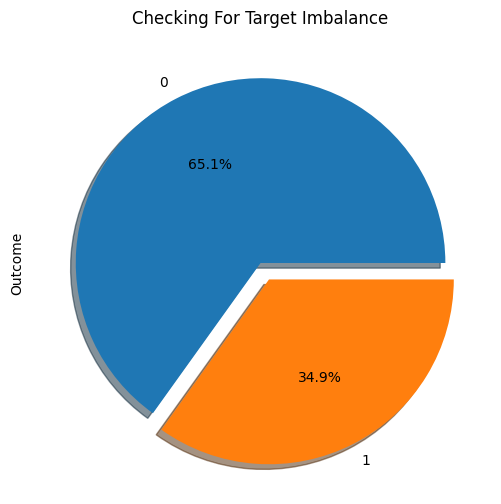

In [30]:
# Checking Target Imbalance

plt.figure(figsize=(10,6))
data.Outcome.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', shadow=True)
plt.title("Checking For Target Imbalance")
plt.show()







## The Target is Well balanced
1. Data Cleaning

In [31]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
# Checking Null Values Percentage

print("==="*25)
print("Checking The Data as Null Values or Not")
print("==="*25)
print(round(data.isnull().sum()*100/len(data),2))

Checking The Data as Null Values or Not
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [34]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<Axes: >

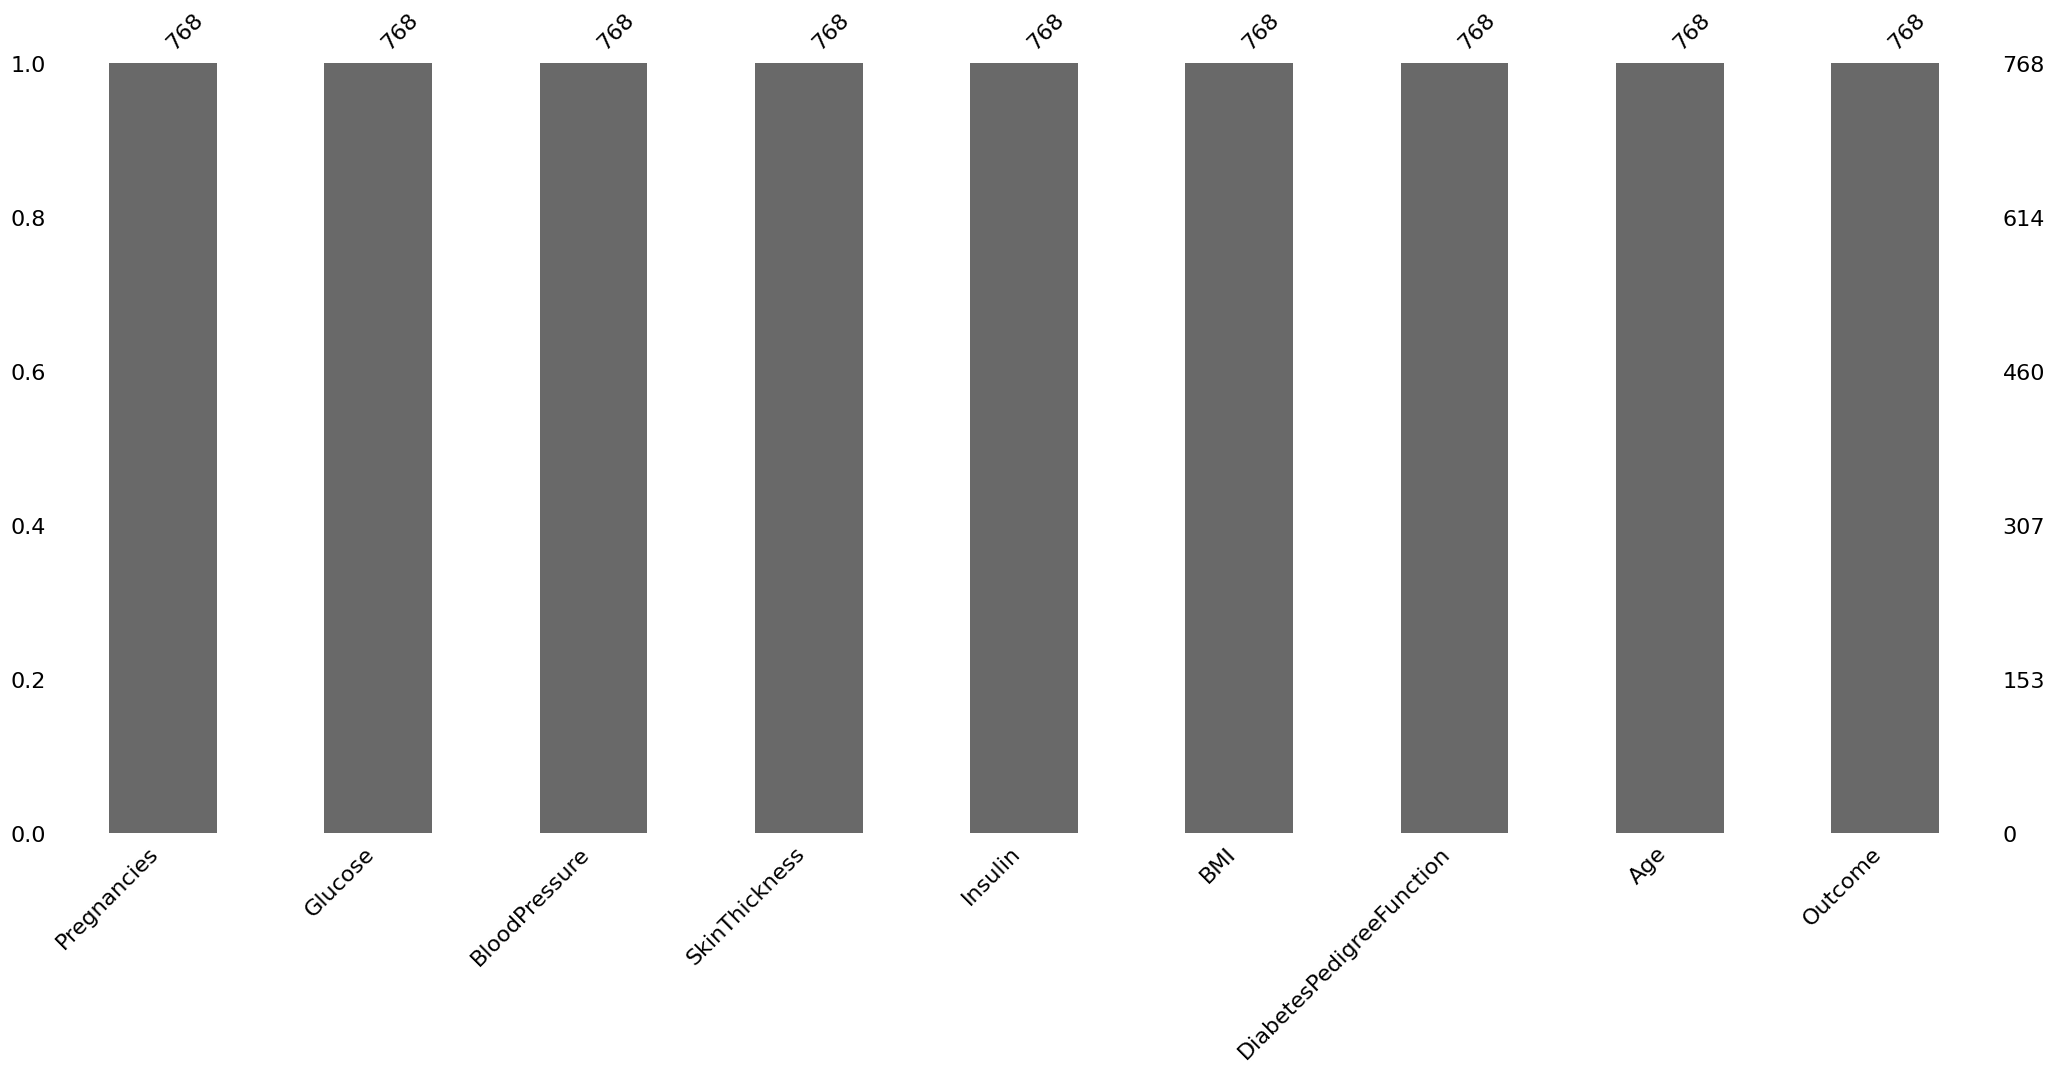

In [35]:
mno.bar(data)

*`This Plot Shows that there is no missing values`*

# **3. Outliers Detection**

<Figure size 2000x800 with 0 Axes>

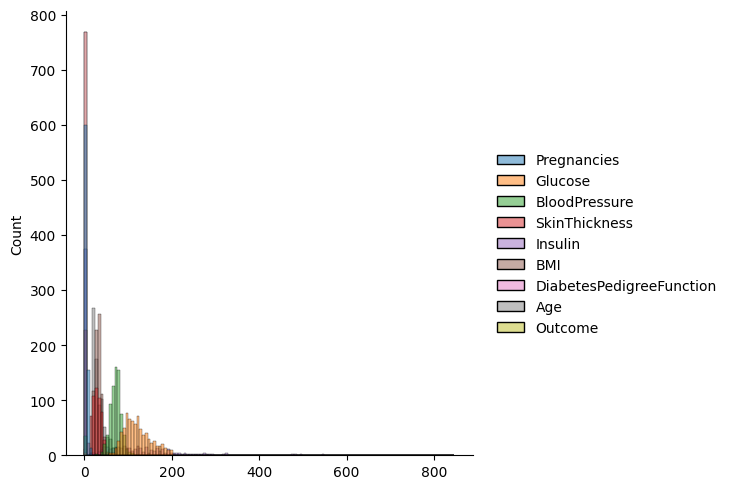

In [36]:
# Checking For Outliers

plt.figure(figsize=(20,8))
sns.displot(data)
plt.show()

<Axes: >

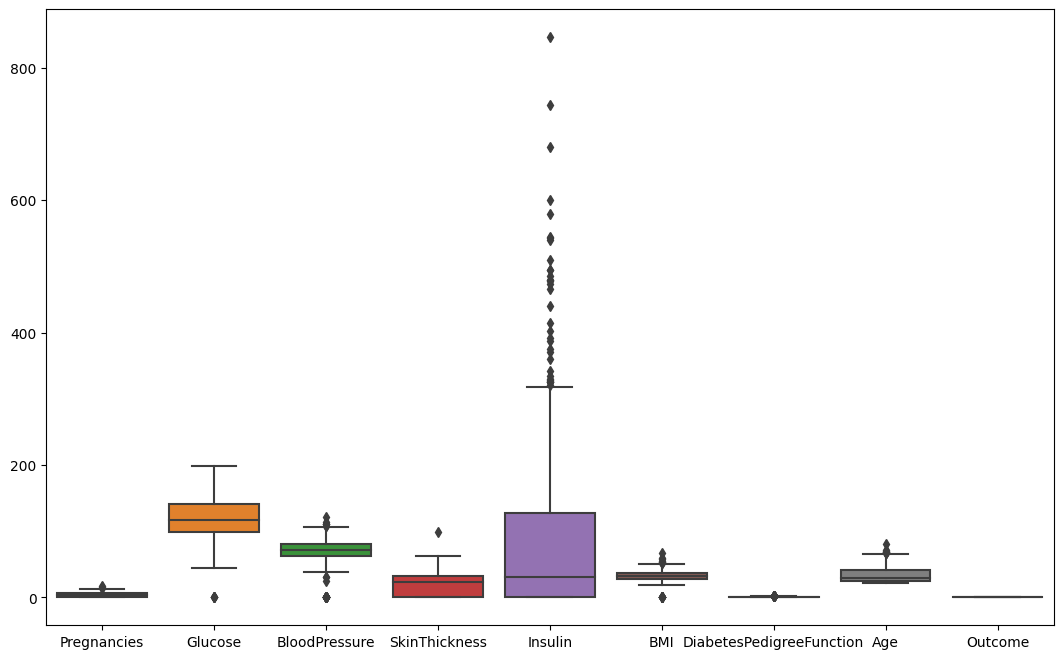

In [40]:
plt.figure(figsize=(13,8))
sns.boxplot(data)


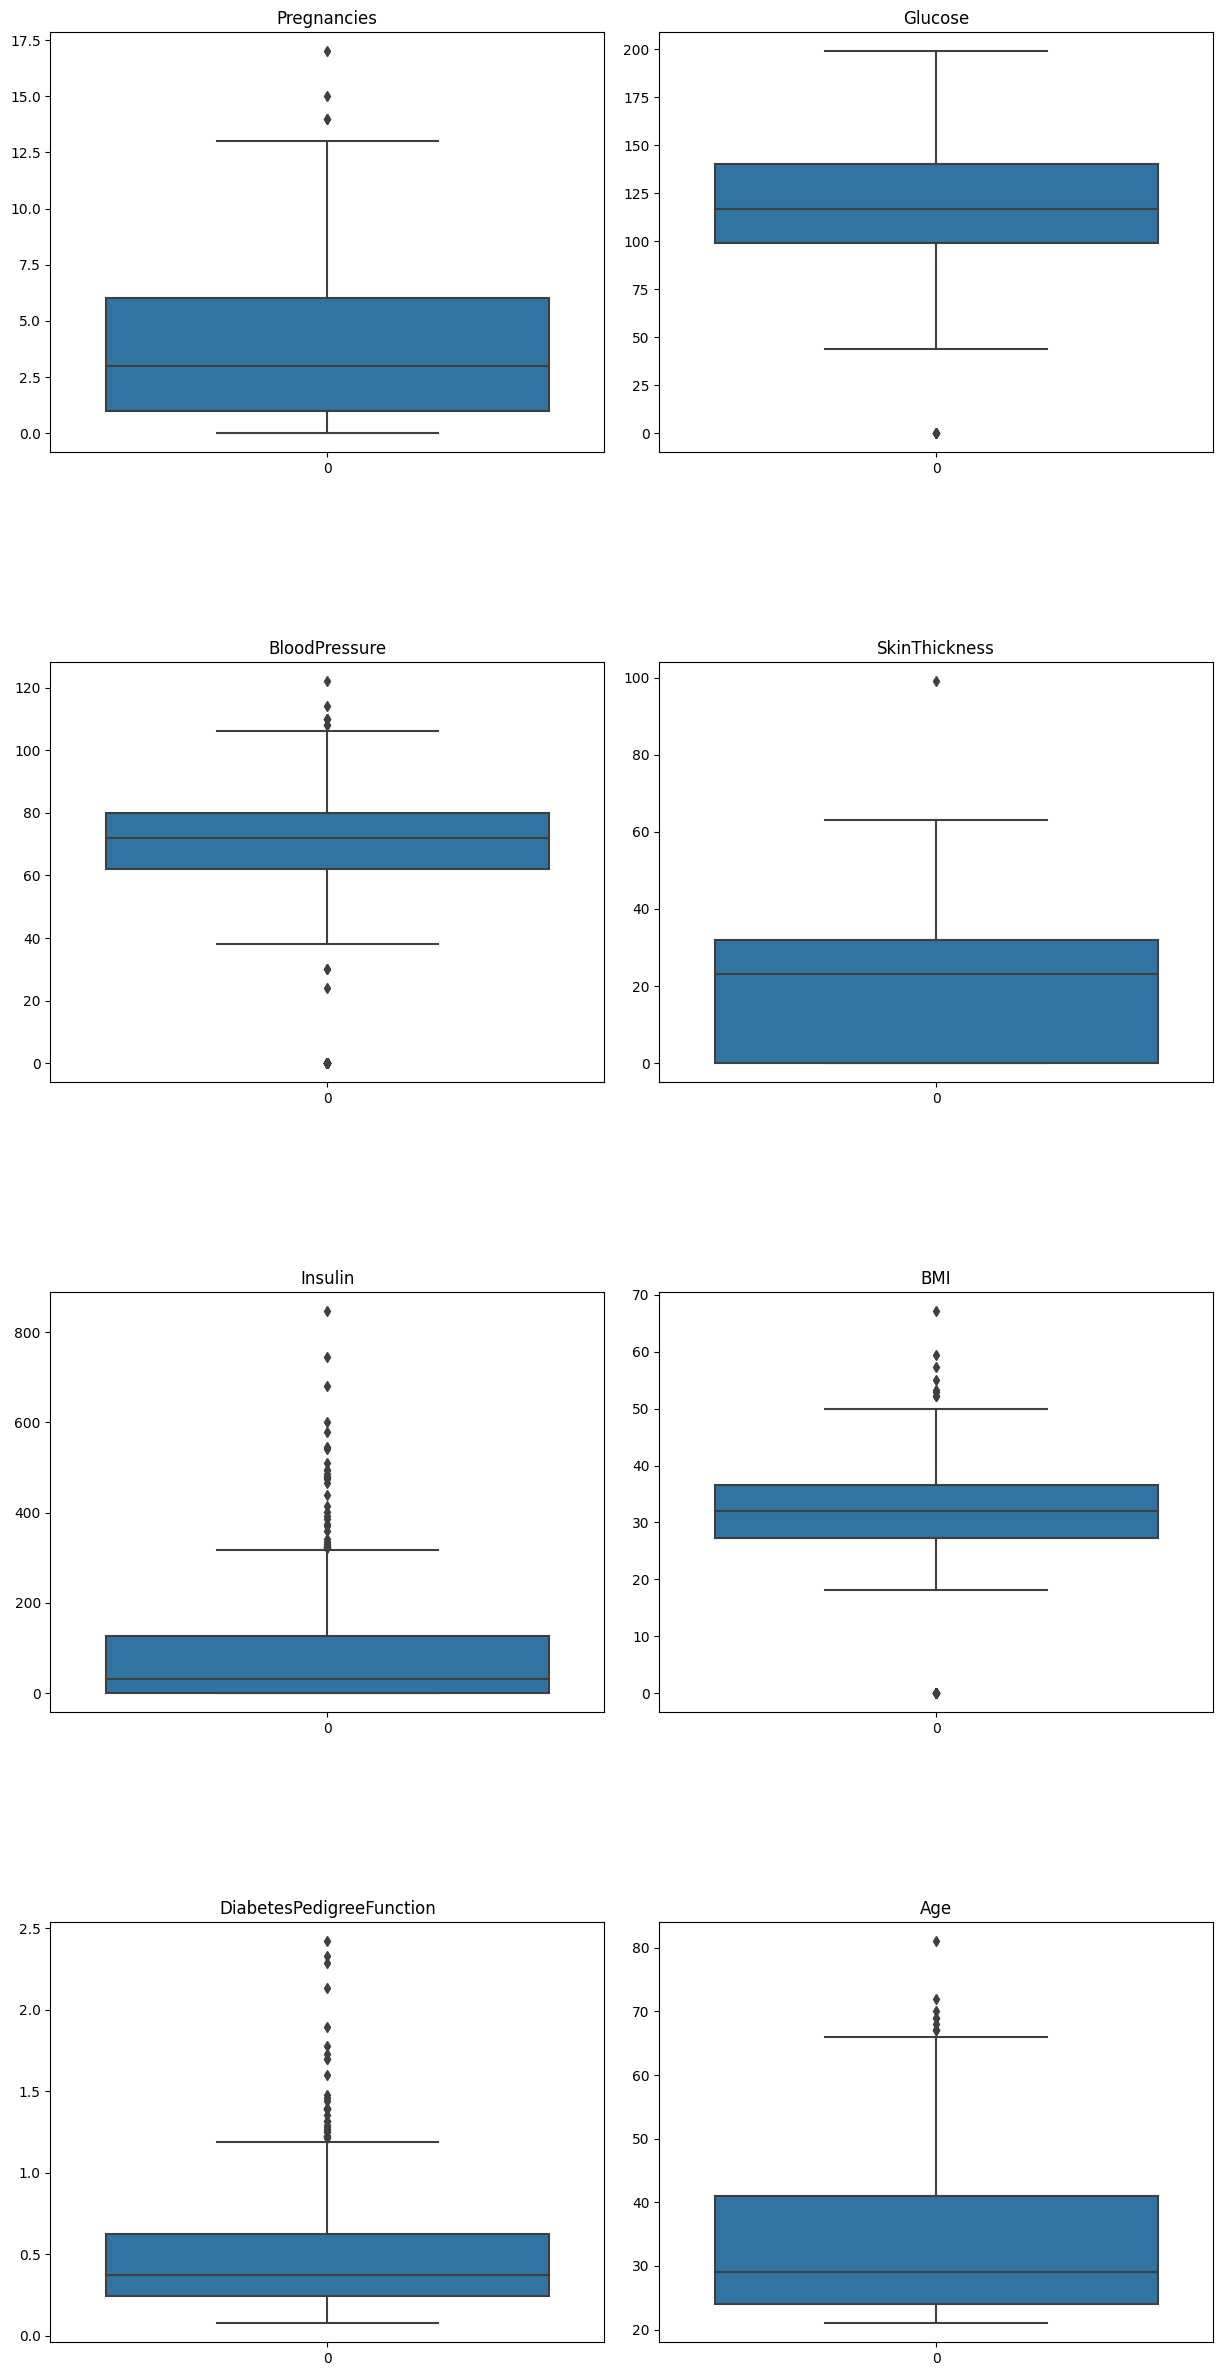

In [42]:
# Checking each features for outliers

col = data.columns[:8]
plt.subplots(figsize=(15,30))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
  plt.subplot(int((length/2)),2,j+1)
  plt.subplots_adjust(wspace=0.1,hspace=0.5)
  sns.boxplot(data[i])
  plt.title(i)
plt.show()

In [43]:
from matplotlib import rcParams


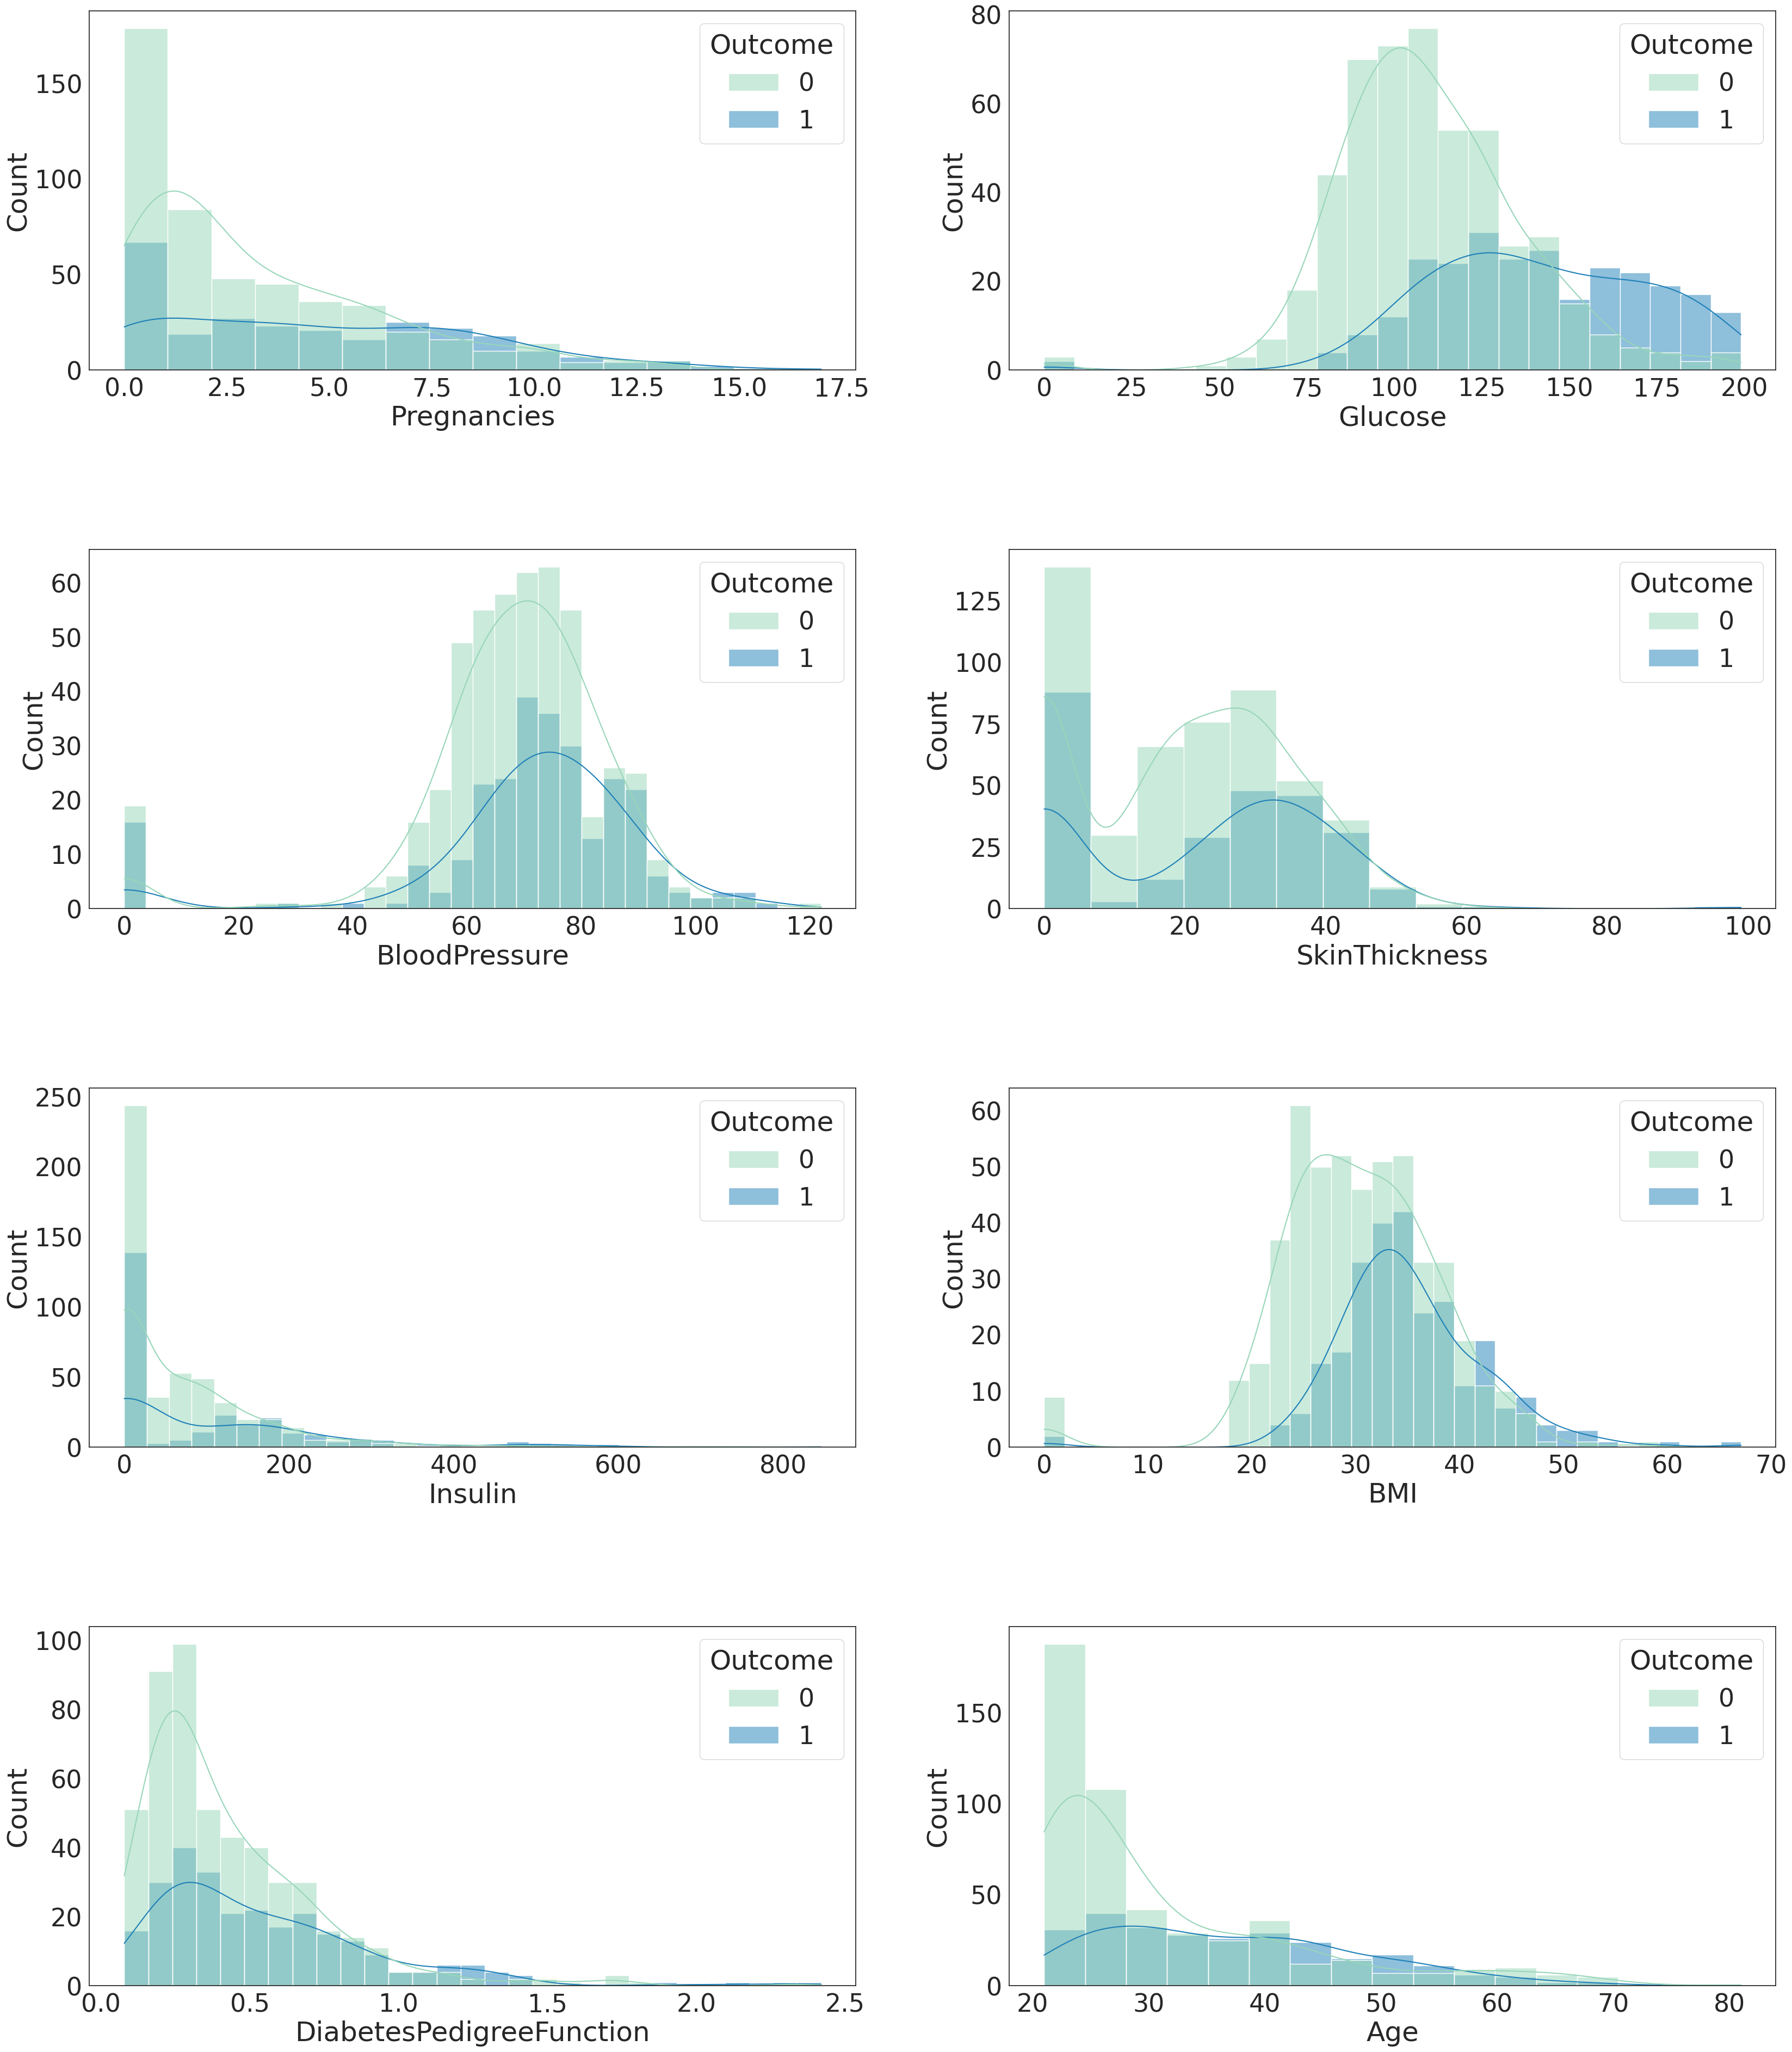

In [44]:
# Checking and replacing the zero values to Mean value.

feature_names = [cname for cname in data.loc[:,:'Age'].columns]

rcParams['figure.figsize']=40,60
sns.set(font_scale=3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for names in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data = data, x=names, hue="Outcome",kde=True,palette="YlGnBu")
    i = i+1





In [48]:
#Checking the Zero values of each features
zero_features =['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = data['Glucose'].count()

for feature in zero_features:
    zero_count = data[data[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature,
  zero_count, 100*zero_count/total_count))


Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [49]:
#Removing outliers
diabetes_mean = data[zero_features].mean()
data[zero_features]=data[zero_features].replace(0, diabetes_mean)

In [50]:
(data==0).sum()


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**`4 Model Building `**

In [51]:
# x,y split
x = data.drop(["Outcome"],axis = 1)
y = data['Outcome']


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 264)

In [54]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

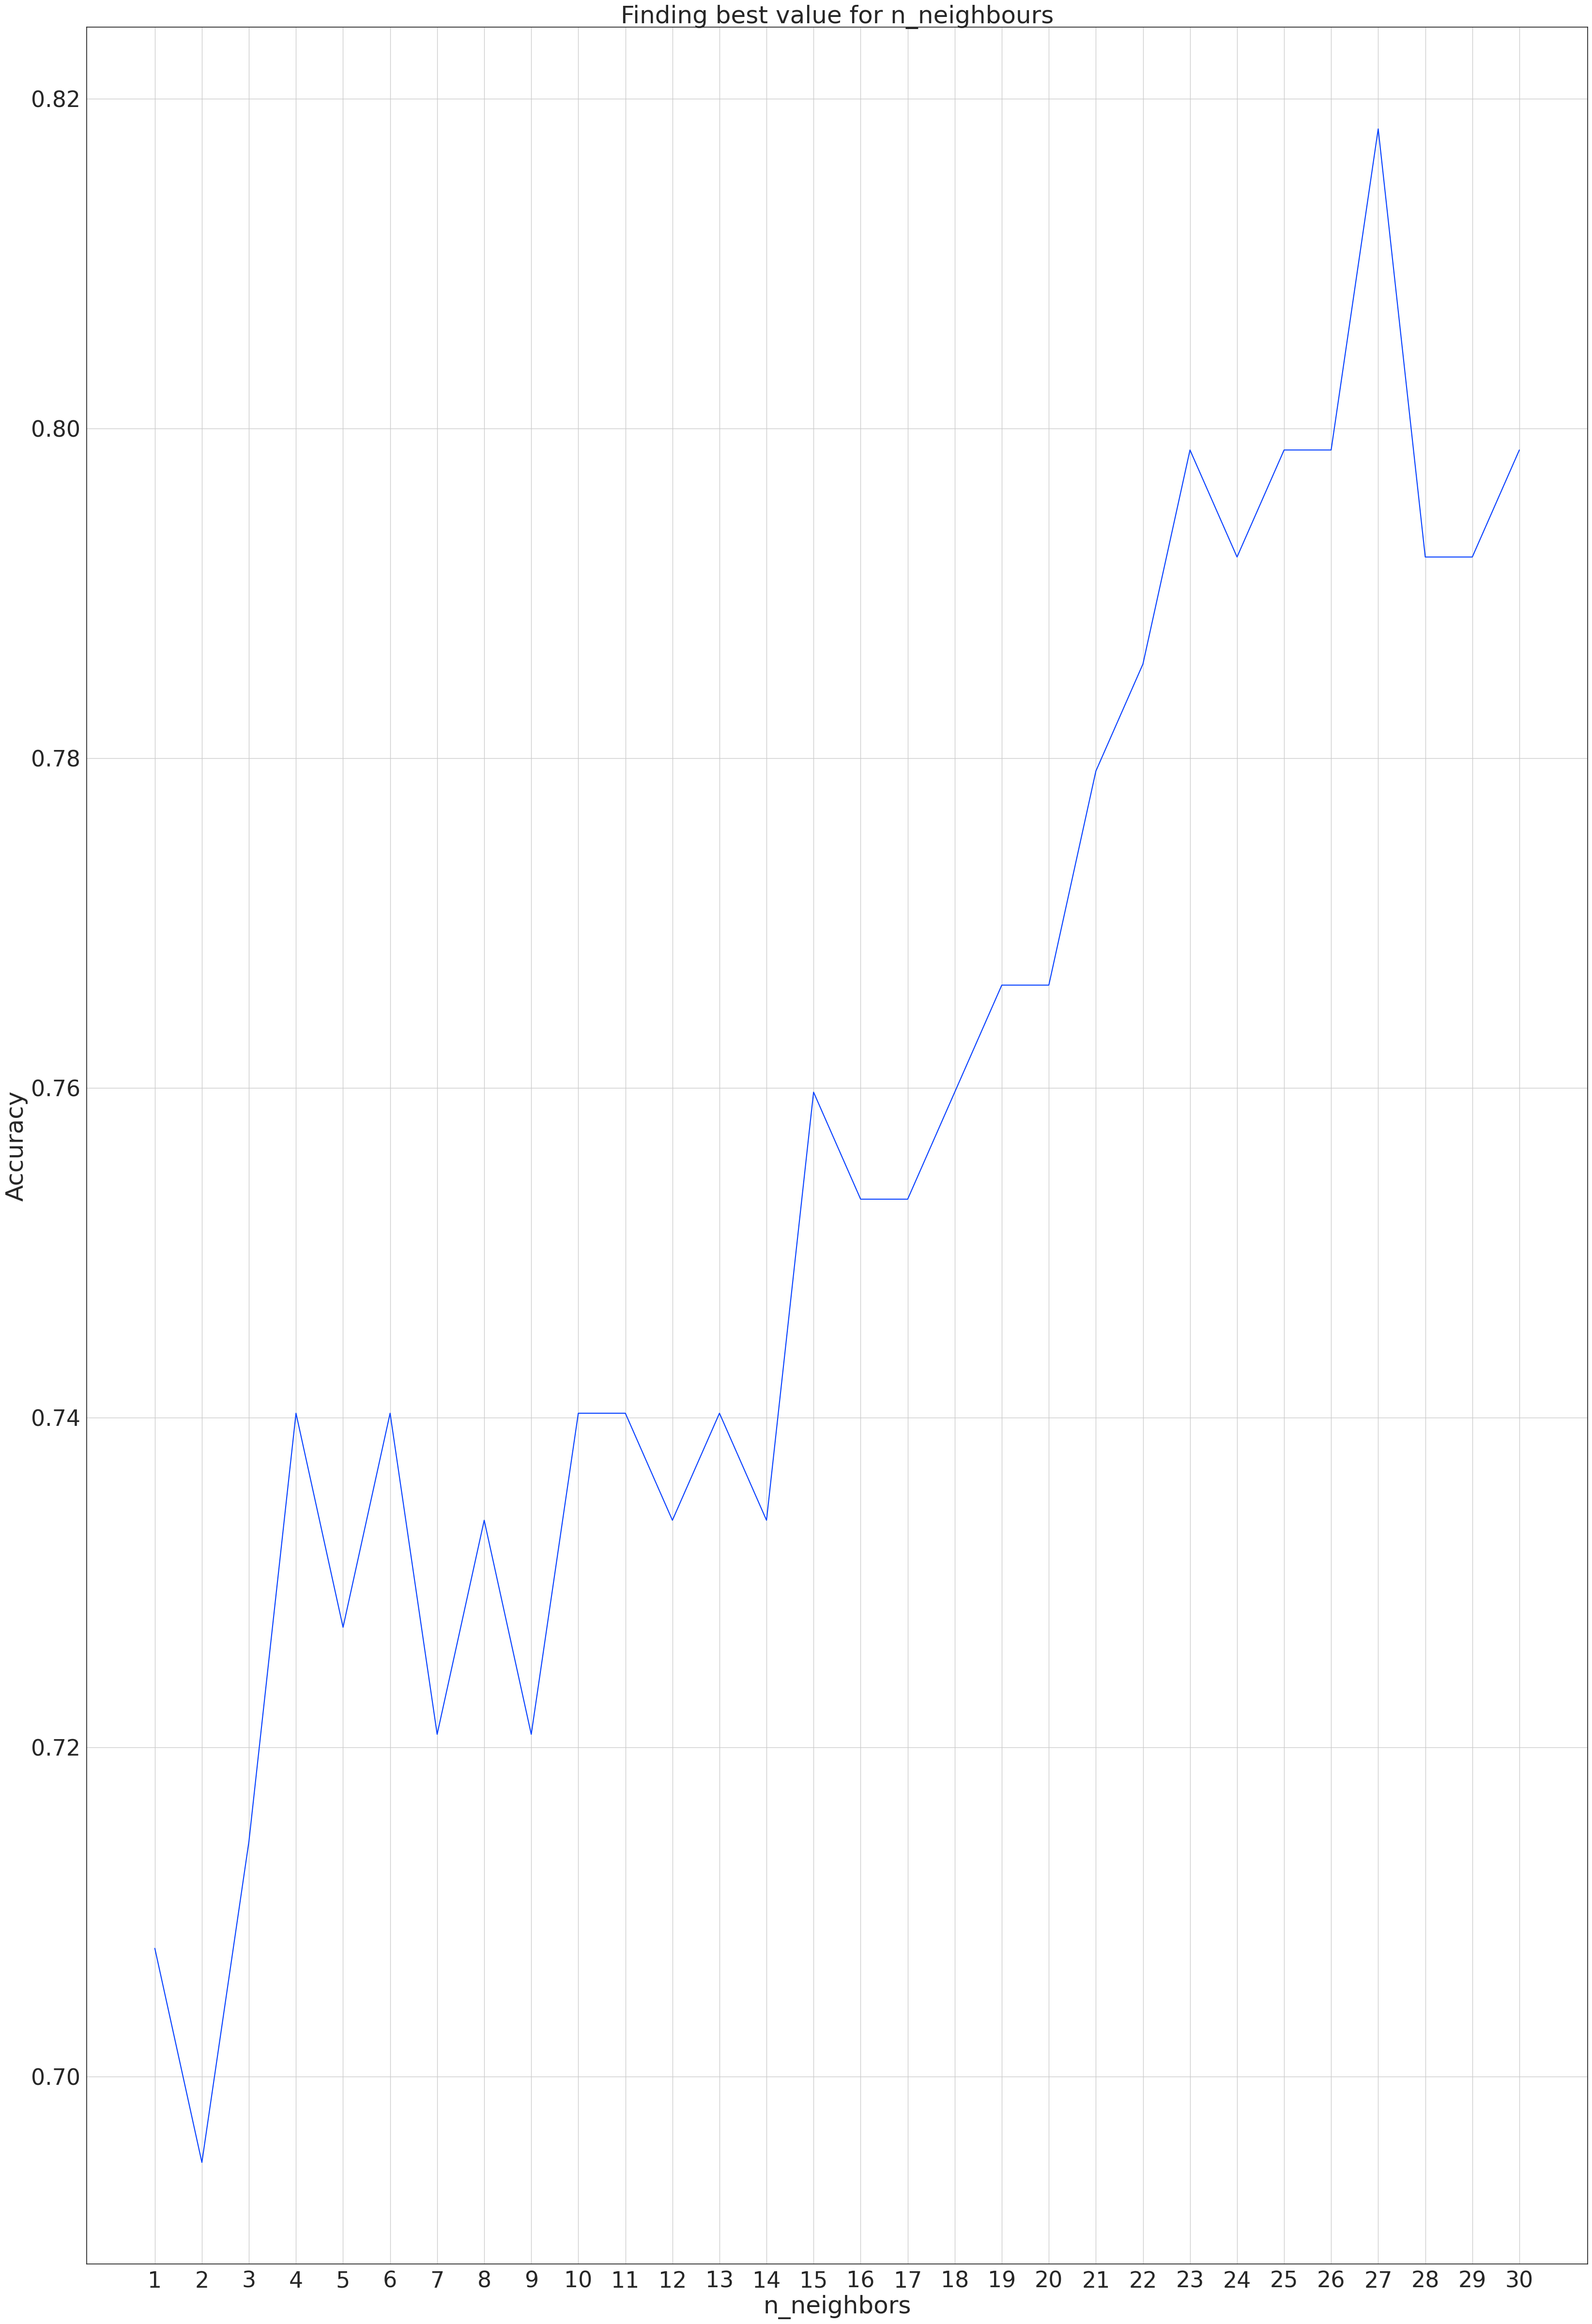

Highest value:  0.8181818181818182


In [60]:
import sklearn.metrics

#Finding best value for n_neighbours
x_axis = list(range(1, 31))

accuracy_values = [] # Use a list to store accuracy values
for i in x_axis:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    accuracy = sklearn.metrics.accuracy_score(prediction, y_test)
    accuracy_values.append(accuracy)

acc = pd.Series(accuracy_values, index=x_axis) # Convert the list to a Pandas␣Series
plt.plot(x_axis, acc)
plt.xticks(x_axis)
plt.title("Finding best value for n_neighbours")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ', acc.max())

In [61]:
 # K - nearest algorithm
knn = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [62]:
y_pred = knn.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [64]:
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy:', (accuracy*100))


Accuracy: 81.81818181818183


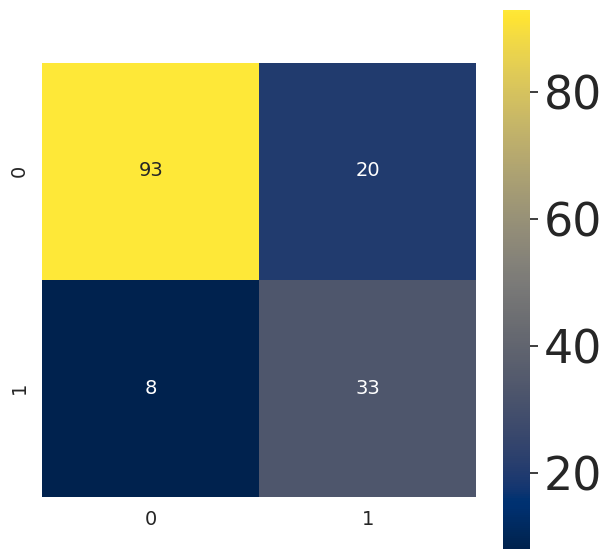

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot = True,fmt='d', cmap = 'cividis', square = True,annot_kws={'size': 14})
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [66]:
report = classification_report(y_pred,y_test)

In [67]:
 print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       113
           1       0.62      0.80      0.70        41

    accuracy                           0.82       154
   macro avg       0.77      0.81      0.79       154
weighted avg       0.84      0.82      0.82       154

